In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

# Dataset

**Historical Wildfires**

This wildfire dataset contains data on fire activities in Australia starting from 2005. Additional information can be found [here](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl).

Variables

- Region: the 7 regions
- Date: in UTC and provide the data for 24 hours ahead
- Estimated_fire_area: daily sum of estimated fire area for presumed vegetation fires with a confidence > 75% for a each region in km2
- Mean_estimated_fire_brightness: daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level > 75% in Kelvin
- Mean_estimated_fire_radiative_power: daily mean of estimated radiative power for presumed vegetation fires with a confidence level > 75% for a given region in megawatts
- Mean_confidence: daily mean of confidence for presumed vegetation fires with a confidence level > 75%
- Std_confidence: standard deviation of estimated fire radiative power in megawatts
- Var_confidence: Variance of estimated fire radiative power in megawatts
- Count: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region
- Replaced: Indicates with an Y whether the data has been replaced with standard quality data when they are available (usually with a 2-3 month lag). Replaced data has a slightly higher quality in terms of locations


In [2]:
import requests
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
resp = requests.get(URL)

# Convert the content of the response to a StringIO object
text = io.StringIO(resp.text)

# Read the CSV content into a pandas DataFrame
df = pd.read_csv(text)

print('Data read into a pandas dataframe!')


Data read into a pandas dataframe!


In [3]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [4]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [5]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

##### 
Convert the 'Date' type to 'datetime' type  and also extract 'Year' and 'Month from the date and include in the dataframe as separate columns

In [6]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [9]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'Year', 'Month'],
      dtype='object')

### TASK 1.1: Let's try to understand the change in average estimated fire area over time <br>(use pandas to plot)


In [17]:
avg_est_fire = df.groupby('Year')['Estimated_fire_area'].mean().reset_index()
avg_est_fire

,Year,Estimated_fire_area
0,2005,92.770501
1,2006,176.289434
2,2007,153.112464
3,2008,99.758968
4,2009,141.624955
5,2010,62.429968
6,2011,266.936175
7,2012,265.526196
8,2013,95.896092
9,2014,144.007348


<Figure size 1200x600 with 0 Axes>

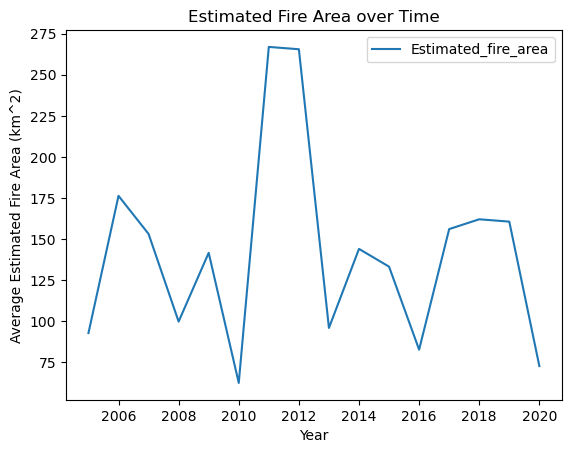

In [26]:
plt.figure(figsize=(12,6))

avg_est_fire.plot(kind='line', x='Year',
        y='Estimated_fire_area')
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km^2)')
plt.title('Estimated Fire Area over Time')

plt.show()

### TASK 1.2: You can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.


In [32]:
# Grouping the data by both 'Year' and 'Month', and calculating the mean of 'Estimated_fire_area'
new_df = df.groupby(['Year', 'Month'])['Estimated_fire_area'].mean()
new_df

Year  Month
2005  1         70.619908
      2        101.018747
      3         40.901576
      4         69.305388
      5         93.834520
                  ...    
2020  6         53.951983
      7         74.716558
      8         31.242304
      9         47.557737
      10        69.045950
Name: Estimated_fire_area, Length: 190, dtype: float64

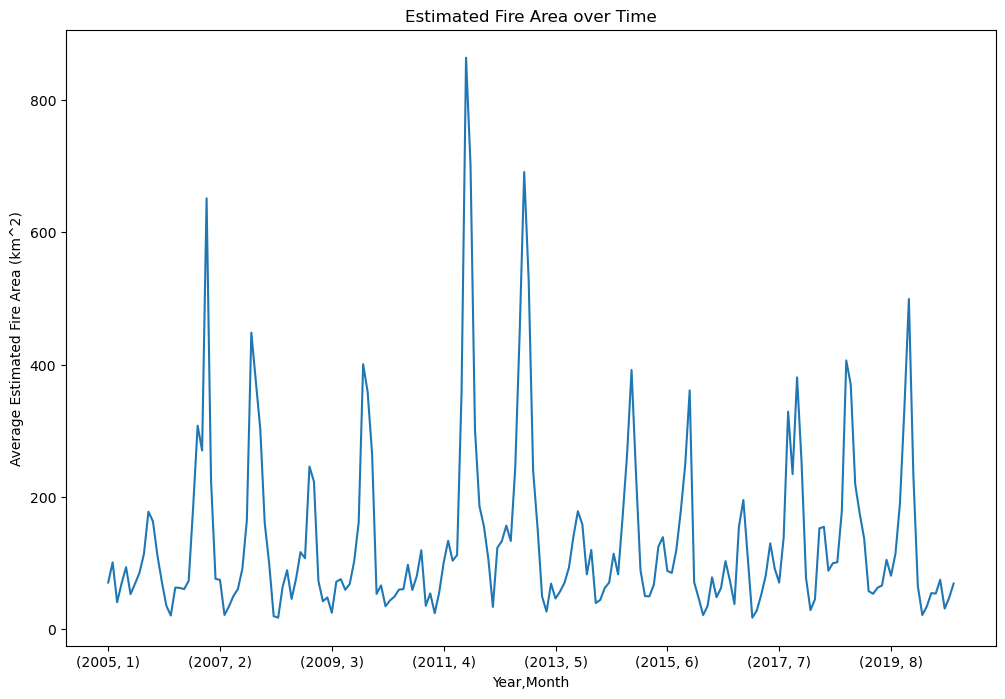

In [39]:
# Plotting the data
plt.figure(figsize=(12,8))
new_df.plot(x=new_df.index, y=new_df.values)
plt.ylabel('Average Estimated Fire Area (km^2)')
plt.title('Estimated Fire Area over Time')
plt.show()

### TASK 1.3: Let's have an insight on the distribution of mean estimated fire brightness across the regions<br> use the functionality of seaborn to develop a barplot


In [40]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

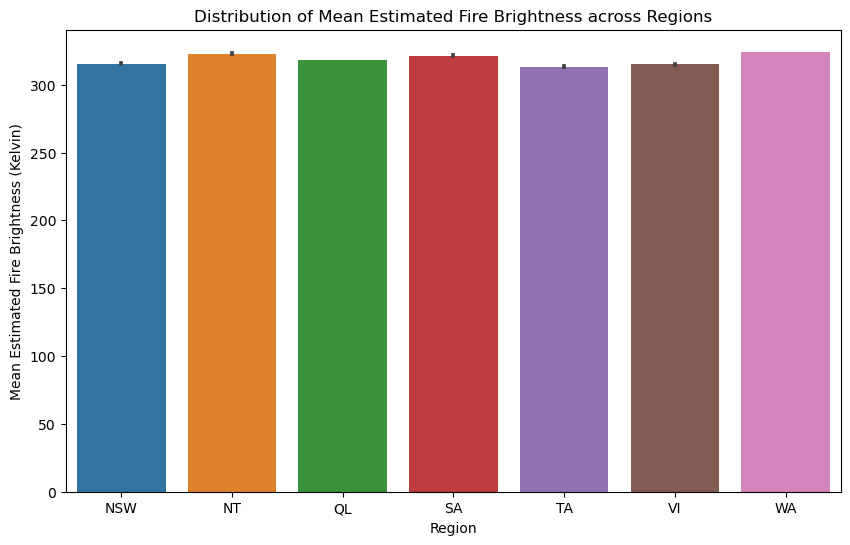

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

### TASK 1.4: Let's find the portion of count of pixels for presumed vegetation fires vary across regions<br> we will develop a pie chart for this


In [47]:
df_Rcount = df.groupby('Region')['Count'].sum()
df_Rcount

Region
NSW    117412
NT     649430
QL     420882
SA      35160
TA      11473
VI      52473
WA     615968
Name: Count, dtype: int64

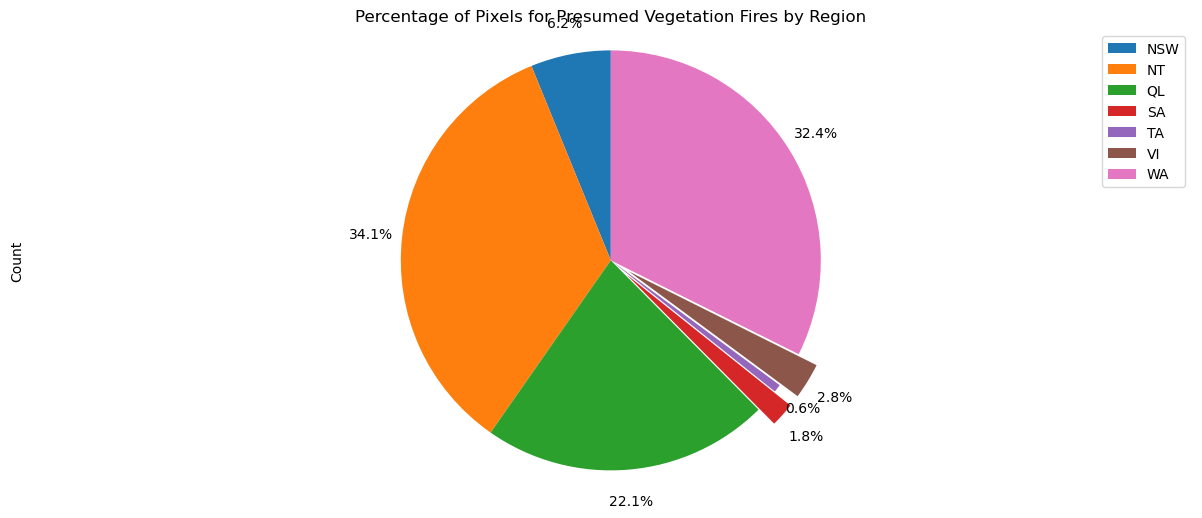

In [92]:

explode_list = [0, 0, 0, 0.1, 0, 0.1, 0]
df_Rcount.plot(kind = 'pie',
               figsize=(15,6),
              autopct = '%1.1f%%',
              startangle = 90,
              shadow = False,
               labels = None,
               pctdistance = 1.15,
              explode = explode_list)

plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.legend(labels=df_Rcount.index, loc ='upper right')
plt.axis('equal')
plt.show()

### TASK 1.5: See the percentage on the pie is not looking so good as it is overlaped for Region SA, TA, VI 

remove the autopct fromm pie function and pass the following to plt.legend() after plt.title() <br>
`[(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)]`
 

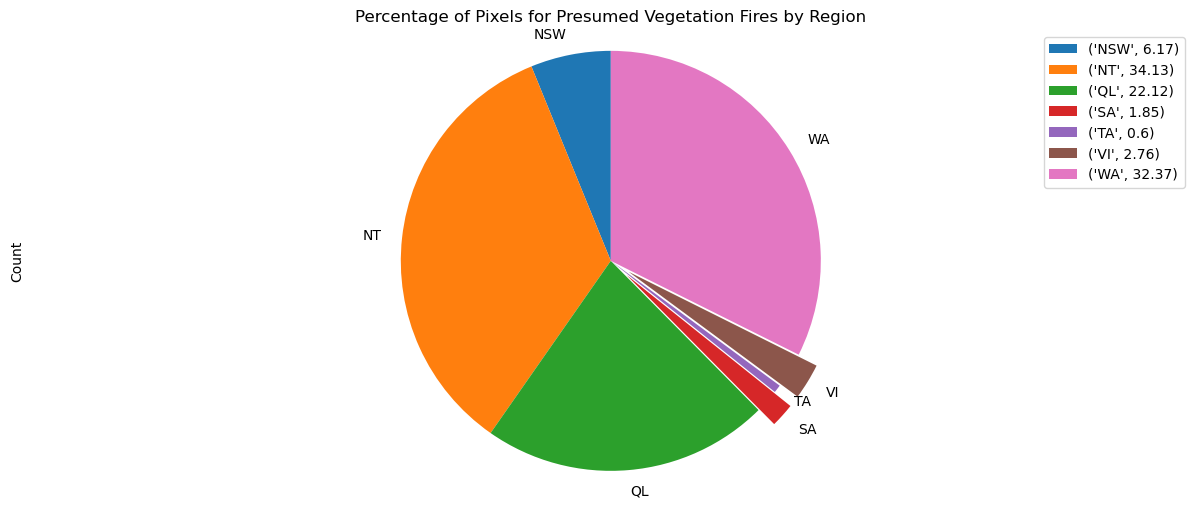

In [93]:

explode_list = [0, 0, 0, 0.1, 0, 0.1, 0]
df_Rcount.plot(kind = 'pie',
               figsize=(15,6),
              
              startangle = 90,
              shadow = False,
               labels = df_Rcount.index,
               pctdistance = 1.15,
              explode = explode_list)

plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.legend([(i,round(k/df_Rcount.sum()*100,2)) for i,k in zip(df_Rcount.index, df_Rcount)])
plt.axis('equal')
plt.show()

### TASK 1.6: Let's try to develop a histogram of the mean estimated fire brightness<br> Using Matplotlib to create the histogram


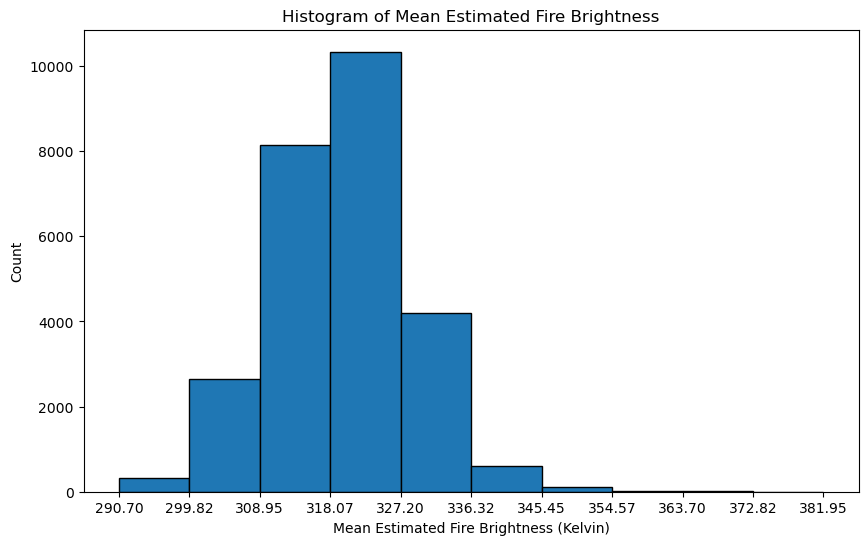

"\nplt.figure(figsize=(10, 6))\n# Using plt.hist to create the histogram\n# Setting the number of bins to 20 for better visualization\nplt.hist(x=df['Mean_estimated_fire_brightness'], bins=20)\nplt.xlabel('Mean Estimated Fire Brightness (Kelvin)')\nplt.ylabel('Count')\nplt.title('Histogram of Mean Estimated Fire Brightness')\nplt.show()\n"

In [108]:
count, bin_edges=np.histogram(df['Mean_estimated_fire_brightness'])
df['Mean_estimated_fire_brightness'].plot(kind='hist', xticks=bin_edges, figsize=(10,6), edgecolor='black' )
plt.ylabel('Mean_estimated_fire_brightness (Kelvin)')
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

"""
plt.figure(figsize=(10, 6))
# Using plt.hist to create the histogram
# Setting the number of bins to 20 for better visualization
plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()
"""

### TASK 1.7: What if we need to understand the distribution of estimated fire brightness across regions? Let's use the functionality of seaborn and  pass region as hue


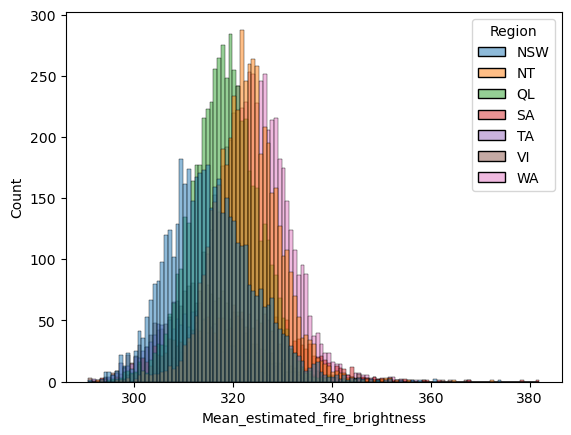

In [101]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region')
plt.show()

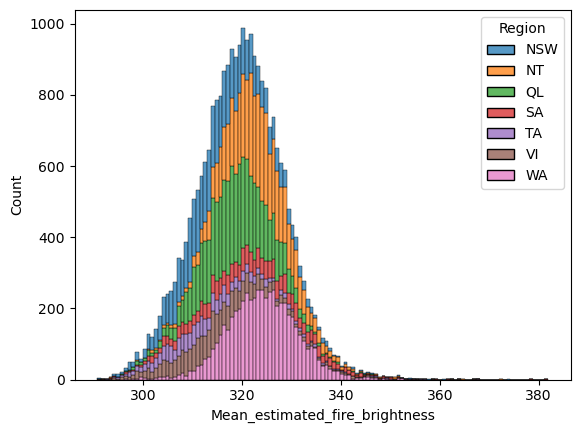

In [102]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness',
             hue='Region', multiple='stack')
plt.show()

### TASK 1.8: Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level?


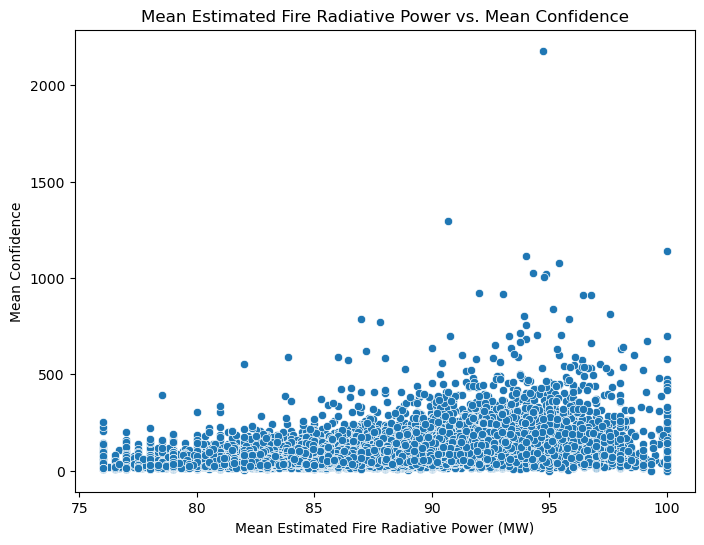

In [107]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Mean_confidence',
                y='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')

plt.show()

### TASK 1.9: Let's mark these seven regions on the Map of Australia using Folium
<br> we have created a dataframe for you containing the regions, their latitudes and longitudes. <br> For australia use [-25, 135] as location to create the map


In [109]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [110]:
# instantiate a feature group
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)